In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import KroghInterpolator


712512.5765549596 1458352.5281376839 629394.731840925


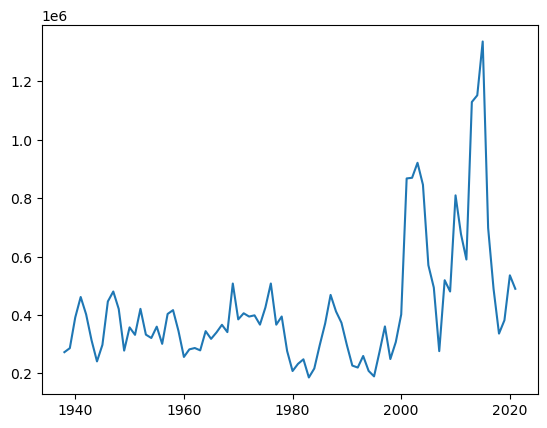

In [100]:
#1

data = np.loadtxt('salmondata.csv', delimiter=',', dtype = int)

years = data[:,0]
salmon = data[:,1]

coeffs1 = np.polyfit(years, salmon, 1)
coeffs3 = np.polyfit(years, salmon, 3)
logSalmon = np.log(salmon)
c0, ln_c1 = np.polyfit(years, logSalmon,1)
c1 = np.exp(ln_c1)
coeffsexp = np.array([c0, c1])

def f(Co, t):
    c0 = Co[0]
    c1 = Co[1]
    return c0*t + c1

def g(Co, t):
    c0 = Co[0]
    c1 = Co[1]
    c2 = Co[2]
    c3 = Co[3]
    return c0*t**3 + c1*t**2 + c2*t + c3

def h(Co,t):
    c0 = Co[0]
    c1 = Co[1]
    return np.log(c1) + c0*t
    
pop1 = f(coeffs1, 2050)
pop3 = g(coeffs3, 2050)
popexp = np.exp(h(coeffsexp, 2050))
print(pop1, pop3, popexp)
plt.plot(years, salmon)
#plt.plot(year, f(coeffs1[0], coeffs1[1], year))
#plt.plot(year, f(coeffs3[0], coeffs3[1], year))
#plt.plot(year, f(coeffsexp[0], coeffsexp[1], year))

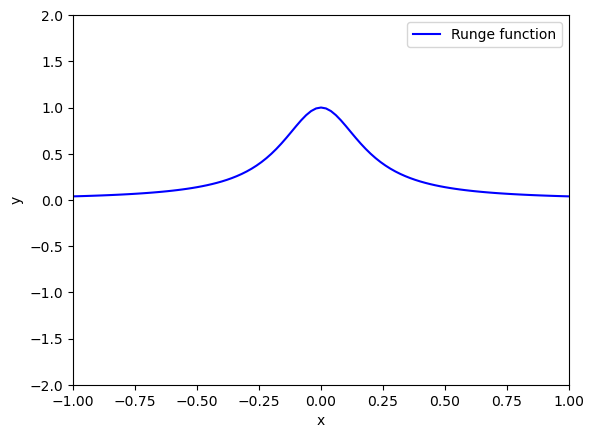

In [102]:
#2a
def r(x):
    return 1/(1+25*x**2)

xrunge = np.linspace(-1,1,101)
yrunge = r(xrunge)

plt.plot(xrunge,yrunge,'-b',label='Runge function')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-1,1,-2,2])
plt.legend()

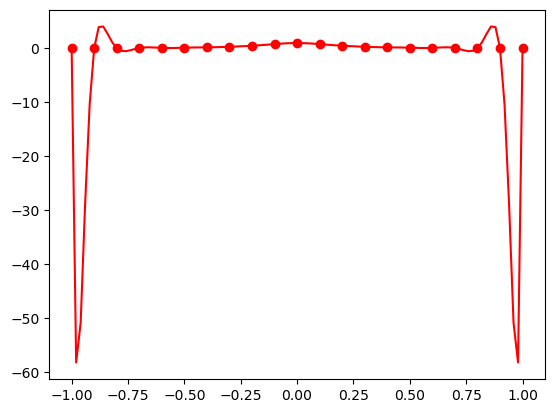

In [128]:
#2b

xequal = np.linspace(-1,1,21)
coeffs20 = np.polyfit(xequal, r(xequal), 20)
yequal = np.polyval(coeffs20, xrunge)

plt.plot(xequal,r(xequal),'ro')
plt.plot(xrunge,yequal,'r-',label='Polynomial interpolation (equal spacing)')

In [ ]:
#2c
error = np.abs(yequal - r(xrunge))
abserrequal = np.trapz(error, xrunge)
print(abserrequal)


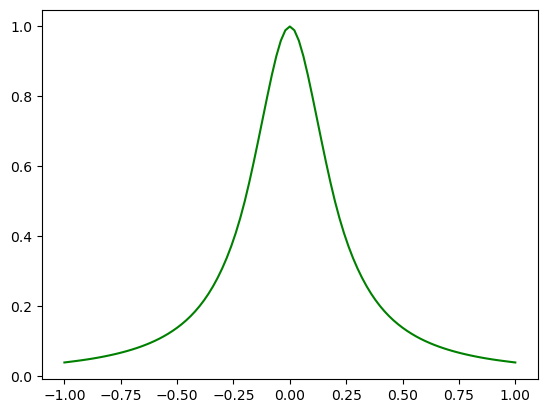

In [122]:
#2d

cs = CubicSpline(xequal, r(xequal), bc_type = 'natural')
yspline = cs(xrunge)
plt.plot(xrunge,yspline,'g-',label='Spline interpolation (equal spacing)')

In [126]:
#2e
error2 = np.abs(yspline - r(xrunge))
abserrspline = np.trapz(error2, xrunge)
print(abserrspline)

0.0008008634112899171


C:\Users\dungd\AppData\Local\Temp\ipykernel_2344\1157501232.py:6: RankWarning: Polyfit may be poorly conditioned
  coeffsB = np.polyfit(xcheby, r(xcheby), 20)


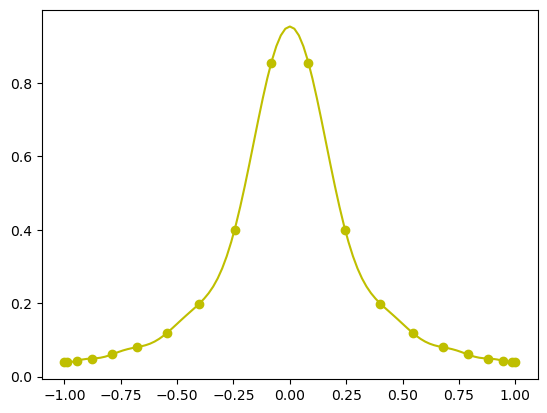

In [127]:
#2f

J = np.arange(19, -1, -1)
xcheby = np.cos(np.pi*J/19)

coeffsB = np.polyfit(xcheby, r(xcheby), 20)
ycheby = np.polyval(coeffsB, xrunge)

plt.plot(xcheby,r(xcheby),'yo')
plt.plot(xrunge,ycheby,'y-',label='Polynomial interpolation (Chebyshev points)')


In [130]:
#2g

error3 = np.abs(ycheby - r(xrunge))
abserrcheby = np.trapz(error3, xrunge)
print(abserrcheby)

0.016371340826068177


In [136]:
#3a

def h(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

c = (np.sqrt(5)-1)/2
a = -10
b = 10
yfin = 0
funceval = 0

x1 = c*a + (1-c)*b
x2 = c*b + (1-c)*a
hx1 = h(x1,yfin)
hx2 = h(x2, yfin)
funceval += 2

for i in range(1, 101):
    if hx1 < hx2:
        b = x2
        x2 = x1
        hx2 = hx1
        x1 = c*a + (1-c)*b
        hx1 = h(x1, yfin)
        funceval += 1
    else:
        a = x1
        x1 = x2
        hx1 = hx2
        x2 = c*b + (1-c)*a
        hx2 = h(x2, yfin)
        funceval += 1

    if b-a < 1e-6:
        break

xfin1 = (a+b)/2
print(xfin1)
print(funceval)
    

3.3956910967896734
37


In [ ]:
#3b

xfin1 = (a+b)/2
c = (np.sqrt(5)-1)/2
a = -10
b = 10
funceval = 0

y1 = c*a + (1-c)*b
y2 = c*b + (1-c)*a
hy1 = h(xfin1,y1)
hy2 = h(xfin1, y2)
funceval += 2

for i in range(1, 101):
    if hy1 < hy2:
        b = y2
        y2 = y1
        hy2 = hy1
        y1 = c*a + (1-c)*b
        hy1 = h(xfin1, y1)
        funceval += 1
    else:
        a = y1
        y1 = y2
        hy1 = hy2
        y2 = c*b + (1-c)*a
        hy2 = h(xfin1, y2)
        funceval += 1

    if b-a < 1e-6:
        break

yfin1 = (a+b)/2
print(yfin1)
print(funceval)

-1.8031830946014722
37


In [143]:
#3c
def h(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2
yfin = yfin1

for i in range(1, 101):
    c = (np.sqrt(5)-1)/2
    a = -10
    b = 10

    x1 = c*a + (1-c)*b
    x2 = c*b + (1-c)*a
    hx1 = h(x1,yfin)
    hx2 = h(x2, yfin)

    for j in range(1, 101):
        if hx1 < hx2:
            b = x2
            x2 = x1
            hx2 = hx1
            x1 = c*a + (1-c)*b
            hx1 = h(x1, yfin)
        else:
            a = x1
            x1 = x2
            hx1 = hx2
            x2 = c*b + (1-c)*a
            hx2 = h(x2, yfin)

        if b-a < 1e-6:
            break

    xfin = (a+b)/2
    a = -10
    b = 10

    y1 = c*a + (1-c)*b
    y2 = c*b + (1-c)*a
    hy1 = h(xfin,y1)
    hy2 = h(xfin, y2)

    for j in range(1, 101):
        if hy1 < hy2:
            b = y2
            y2 = y1
            hy2 = hy1
            y1 = c*a + (1-c)*b
            hy1 = h(xfin, y1)
        else:
            a = y1
            y1 = y2
            hy1 = hy2
            y2 = c*b + (1-c)*a
            hy2 = h(xfin, y2)

        if b-a < 1e-6:
            break
        
    yfin = (a+b)/2
    if h(xfin, yfin) < 1e-6:
        break

himopt = np.array([xfin, yfin])
print(himopt)

[ 3.58442847 -1.84812665]
